## Application of K-Neighbors algorithm for Hololens Data 

In [16]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Pour faire des graphiques 3D
from sklearn.neighbors import KNeighborsClassifier

Let's start by applying the Algorithm with players 8 and 9 (those with more data available). We'll use the data generated by sampling the trajectory with a frequency of 1Hz

In [17]:
X = np.genfromtxt('./features/features_p8_p9_1.csv', delimiter=',')
y = np.genfromtxt('./features/output_p8_p9_1.csv', delimiter=',')

## Applying PCA

In [18]:
model_pca3 = PCA(n_components=3)

# On entraîne notre modèle (fit) sur les données
model_pca3.fit(X)

# On applique le résultat sur nos données :
X_reduced3 = model_pca3.transform(X)

# On crée notre modèle pour obtenir 2 composantes
model_pca2 = PCA(n_components = 2)

# On entraîne notre modèle (fit) sur les données
model_pca2.fit(X)

# On applique le résultat sur nos données :
X_reduced2 = model_pca2.transform(X)

## Applying K-means    


In [19]:
def visualiser_modele(model):
    
    #levels = [0, 1, 2, 3]
    levels = [7, 8, 9, 10]
    colors = ['red', 'yellow', 'blue']
    cmap, norm = matplotlib.colors.from_levels_and_colors(levels, colors)
    
    # On crée un tableau de coordonnées pour chaque point du plan (une grille)
    xx, yy = np.meshgrid(np.arange(-4, 4, 0.1), np.arange(-1.5, 1.6, 0.1))
    X_grid = np.c_[xx.flatten(), yy.flatten()]

    # On calcule ce que prédit le classifier en chaque point de ce plan
    y_grid = model.predict(X_grid)

    # On dessine ce que le modèle prévoit sur le plan
    plt.contourf(xx, yy, y_grid.reshape(xx.shape), cmap='Spectral')

    # On affiche les points du training en contour noir
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, marker = "o", norm=norm, cmap=cmap, edgeColor='black')

    # On affiche les points du test en contour blanc
    plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, marker ="o",norm=norm, cmap=cmap, edgeColor='white', linewidths=2)
    
#visualiser_modele(model_knn)

Précision : 60%


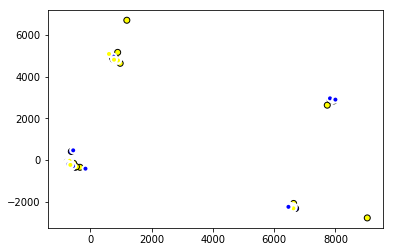

In [109]:
#applying K-means    
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Réduire à 2 dimensions
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

Let's try a 3-dimension PCA now

In [108]:
p = np.random.permutation(len(X))
X, y = X[p], y[p]

model_pca3 = PCA(n_components=3)
model_pca3.fit(X)
X_reduced3 = model_pca3.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced3[:int(l*training_ratio)]
X_test = X_reduced3[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))


Précision : 67%


The precision increased from 67% to 60% using a PCA of dimension 3. Let's analyse using a PCA of dimension 10

In [112]:
model_pca10 = PCA(n_components=10)
model_pca10.fit(X)
X_reduced10 = model_pca3.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced10[:int(l*training_ratio)]
X_test = X_reduced10[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(30)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

Précision : 60%


The precision doesn't change.

## We'll now use the features vector generated by the each pop balloon instead of each second

In [117]:
X = np.genfromtxt('./features/features_p8_p9_pop.csv', delimiter=',')
y = np.genfromtxt('./features/output_p8_p9_pop.csv', delimiter=',')

Précision : 75%


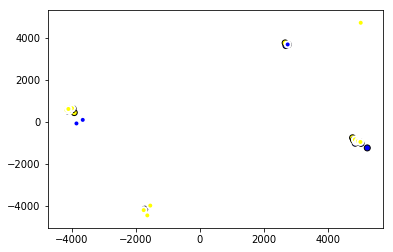

In [124]:

#applying K-Neighbors    
# Mélanger le dataset (penser à mélanger les features et les labels de la même façon...)
p = np.random.permutation(len(X))
X, y = X[p], y[p]

# Réduire à 2 dimensions
model_pca2.fit(X)
X_reduced2 = model_pca2.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced2[:int(l*training_ratio)]
X_test = X_reduced2[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(4)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

# Afficher les résultats
visualiser_modele(model_knn)

It seems that the precision increases when compared to the data sampled with 1Hz. This can be explained by less "noise" in the data

Let's try now with a 10 dimension PCA

In [132]:
p = np.random.permutation(len(X))
X, y = X[p], y[p]

model_pca10 = PCA(n_components=10)
model_pca10.fit(X)
X_reduced10 = model_pca10.transform(X)

# Séparer training et test
training_ratio = 0.6
l = len(X)
X_train = X_reduced10[:int(l*training_ratio)]
X_test = X_reduced10[int(l*training_ratio):]
y_train = y[:int(l*training_ratio)]
y_test = y[int(l*training_ratio):]


# Créer le classifier
model_knn = KNeighborsClassifier(3)

# Entrainer le classifier sur les données d'entrainement (X_train et y_train)
model_knn.fit(X_train, y_train)

# Evaluer
y_pred = model_knn.predict(X_test)

true_positive = sum(y_pred == y_test)
n_predictions = len(y_test)
accuracy = true_positive / n_predictions

print("Précision : %i%%" % (accuracy * 100))

Précision : 68%


## With 10 dimension PCA we notice that our accuracy is even worse (68% against the 75% we had before). This is mainly due to the fact that we have too little amount of data, and at each time we run the algorithm, we get a very different precision (ranging from 45 to 75%). We are not able to conclude anything from this study, given that randomly choosing the players we could get a precision of 50%